In [1]:
!pip install statsbombpy

     |████████████████████████████████| 144 kB 29.0 MB/s 
     |████████████████████████████████| 47 kB 5.3 MB/s 
     |████████████████████████████████| 207 kB 22.6 MB/s 
     |████████████████████████████████| 127 kB 40.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: coverage
    Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires coverage==3.7.1, but you have coverage 6.3.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
coveralls 0.5 requires coverage<3.999,>=3.6, but you have coverage 6.3.2 which is incomp

In [2]:
!pip install mplsoccer

     |████████████████████████████████| 57 kB 5.0 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-py3-none-any.whl size=62946 sha256=5aee345aa21e5f7e7d563f30c8c7ec2cf74f8d61140f8f4118833320e150ebc3
  Stored in directory: /root/.cache/pip/wheels/35/71/46/5f3df8e696517b395ed75971c4d09f5854310efc09d364a9ca
Successfully built mplsoccer


In [3]:
from statsbombpy import sb

In [4]:
events = sb.events(match_id = 18236)

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [5]:
events = events[['team','type','minute','location','pass_end_location','player','pass_recipient']]

In [6]:
events_1=events[events['team']=='Barcelona']
events_1

,team,type,minute,location,pass_end_location,player,pass_recipient
0,Barcelona,Starting XI,0,NaN,NaN,NaN,NaN
3,Barcelona,Half Start,0,NaN,NaN,NaN,NaN
5,Barcelona,Half Start,45,NaN,NaN,NaN,NaN
9,Barcelona,Pass,0,"[35.0, 1.0]","[51.0, 16.0]",Eric-Sylvain Bilal Abidal,Lionel Andrés Messi Cuccittini
10,Barcelona,Pass,0,"[51.0, 16.0]","[50.0, 25.0]",Lionel Andrés Messi Cuccittini,Sergio Busquets i Burgos
...,...,...,...,...,...,...,...
4319,Barcelona,Offside,56,"[117.0, 16.0]",NaN,Eric-Sylvain Bilal Abidal,NaN
4322,Barcelona,Substitution,85,NaN,NaN,David Villa Sánchez,NaN
4323,Barcelona,Substitution,87,NaN,NaN,Daniel Alves da Silva,NaN
4324,Barcelona,Substitution,91,NaN,NaN,Pedro Eliezer Rodríguez Ledesma,NaN


In [7]:
events_1[events_1['type']=='Substitution']

,team,type,minute,location,pass_end_location,player,pass_recipient
4322,Barcelona,Substitution,85,NaN,NaN,David Villa Sánchez,NaN
4323,Barcelona,Substitution,87,NaN,NaN,Daniel Alves da Silva,NaN
4324,Barcelona,Substitution,91,NaN,NaN,Pedro Eliezer Rodríguez Ledesma,NaN


In [8]:
pass_events=events_1[events_1['type']=='Pass'].reset_index()
pass_events

,index,team,type,minute,location,pass_end_location,player,pass_recipient
0,9,Barcelona,Pass,0,"[35.0, 1.0]","[51.0, 16.0]",Eric-Sylvain Bilal Abidal,Lionel Andrés Messi Cuccittini
1,10,Barcelona,Pass,0,"[51.0, 16.0]","[50.0, 25.0]",Lionel Andrés Messi Cuccittini,Sergio Busquets i Burgos
2,11,Barcelona,Pass,0,"[53.0, 28.0]","[55.0, 65.0]",Sergio Busquets i Burgos,Daniel Alves da Silva
3,17,Barcelona,Pass,0,"[8.0, 40.0]","[6.0, 70.0]",Víctor Valdés Arribas,Javier Alejandro Mascherano
4,18,Barcelona,Pass,1,"[21.0, 65.0]","[6.0, 48.0]",Javier Alejandro Mascherano,Víctor Valdés Arribas
...,...,...,...,...,...,...,...,...
822,1221,Barcelona,Pass,92,"[68.0, 48.0]","[65.0, 45.0]",Xavier Hernández Creus,Andrés Iniesta Luján
823,1222,Barcelona,Pass,92,"[64.0, 45.0]","[57.0, 69.0]",Andrés Iniesta Luján,Carles Puyol i Saforcada
824,1223,Barcelona,Pass,92,"[57.0, 69.0]","[67.0, 76.0]",Carles Puyol i Saforcada,Ibrahim Afellay
825,1224,Barcelona,Pass,92,"[67.0, 76.0]","[55.0, 77.0]",Ibrahim Afellay,Carles Puyol i Saforcada


In [9]:
pass_events=pass_events[pass_events['minute']<85]
pass_events

,index,team,type,minute,location,pass_end_location,player,pass_recipient
0,9,Barcelona,Pass,0,"[35.0, 1.0]","[51.0, 16.0]",Eric-Sylvain Bilal Abidal,Lionel Andrés Messi Cuccittini
1,10,Barcelona,Pass,0,"[51.0, 16.0]","[50.0, 25.0]",Lionel Andrés Messi Cuccittini,Sergio Busquets i Burgos
2,11,Barcelona,Pass,0,"[53.0, 28.0]","[55.0, 65.0]",Sergio Busquets i Burgos,Daniel Alves da Silva
3,17,Barcelona,Pass,0,"[8.0, 40.0]","[6.0, 70.0]",Víctor Valdés Arribas,Javier Alejandro Mascherano
4,18,Barcelona,Pass,1,"[21.0, 65.0]","[6.0, 48.0]",Javier Alejandro Mascherano,Víctor Valdés Arribas
...,...,...,...,...,...,...,...,...
785,1118,Barcelona,Pass,84,"[55.0, 36.0]","[75.0, 49.0]",Gerard Piqué Bernabéu,Xavier Hernández Creus
786,1119,Barcelona,Pass,84,"[80.0, 56.0]","[75.0, 71.0]",Xavier Hernández Creus,Daniel Alves da Silva
787,1120,Barcelona,Pass,84,"[76.0, 71.0]","[78.0, 63.0]",Daniel Alves da Silva,Xavier Hernández Creus
788,1121,Barcelona,Pass,84,"[78.0, 63.0]","[71.0, 69.0]",Xavier Hernández Creus,Daniel Alves da Silva


In [10]:
passes_between=pass_events.groupby(['player','pass_recipient'],as_index=False).agg({'type':'count'})
passes_between

,player,pass_recipient,type
0,Andrés Iniesta Luján,Daniel Alves da Silva,9
1,Andrés Iniesta Luján,David Villa Sánchez,3
2,Andrés Iniesta Luján,Eric-Sylvain Bilal Abidal,6
3,Andrés Iniesta Luján,Gerard Piqué Bernabéu,4
4,Andrés Iniesta Luján,Javier Alejandro Mascherano,3
...,...,...,...
88,Xavier Hernández Creus,Javier Alejandro Mascherano,13
89,Xavier Hernández Creus,Lionel Andrés Messi Cuccittini,24
90,Xavier Hernández Creus,Pedro Eliezer Rodríguez Ledesma,11
91,Xavier Hernández Creus,Sergio Busquets i Burgos,15


In [11]:
#for all events for france
game=events_1[(events_1['player'].isin(passes_between['player'])) & (events_1['pass_recipient'].isin(passes_between['pass_recipient']))]
game['pass_recipient'].nunique()

11

In [12]:
game=game.groupby(['player','pass_recipient'],as_index=False).agg({'type':'count'})
game

,player,pass_recipient,type
0,Andrés Iniesta Luján,Daniel Alves da Silva,9
1,Andrés Iniesta Luján,David Villa Sánchez,3
2,Andrés Iniesta Luján,Eric-Sylvain Bilal Abidal,7
3,Andrés Iniesta Luján,Gerard Piqué Bernabéu,4
4,Andrés Iniesta Luján,Javier Alejandro Mascherano,3
...,...,...,...
89,Xavier Hernández Creus,Javier Alejandro Mascherano,13
90,Xavier Hernández Creus,Lionel Andrés Messi Cuccittini,25
91,Xavier Hernández Creus,Pedro Eliezer Rodríguez Ledesma,11
92,Xavier Hernández Creus,Sergio Busquets i Burgos,15


In [13]:
game.rename(columns={'type':'pass_count'},inplace=True)

In [14]:
desc=game.describe()
threshold=desc.iloc[4]
thresh=threshold.item()
game=game[game['pass_count']>thresh].reset_index(drop=True)
game.describe()

,pass_count
count,67.000000
mean,10.850746
std,7.734719
min,4.000000
25%,5.000000
50%,9.000000
75%,13.000000
max,34.000000


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,10))
scaler.fit(game['pass_count'].values.reshape(-1,1))
game['pass_count']=scaler.transform(game['pass_count'].values.reshape(-1,1))
game

,player,pass_recipient,pass_count
0,Andrés Iniesta Luján,Daniel Alves da Silva,1.666667
1,Andrés Iniesta Luján,Eric-Sylvain Bilal Abidal,1.000000
2,Andrés Iniesta Luján,Gerard Piqué Bernabéu,0.000000
3,Andrés Iniesta Luján,Lionel Andrés Messi Cuccittini,10.000000
4,Andrés Iniesta Luján,Pedro Eliezer Rodríguez Ledesma,3.666667
...,...,...,...
62,Xavier Hernández Creus,Gerard Piqué Bernabéu,0.666667
63,Xavier Hernández Creus,Javier Alejandro Mascherano,3.000000
64,Xavier Hernández Creus,Lionel Andrés Messi Cuccittini,7.000000
65,Xavier Hernández Creus,Pedro Eliezer Rodríguez Ledesma,2.333333


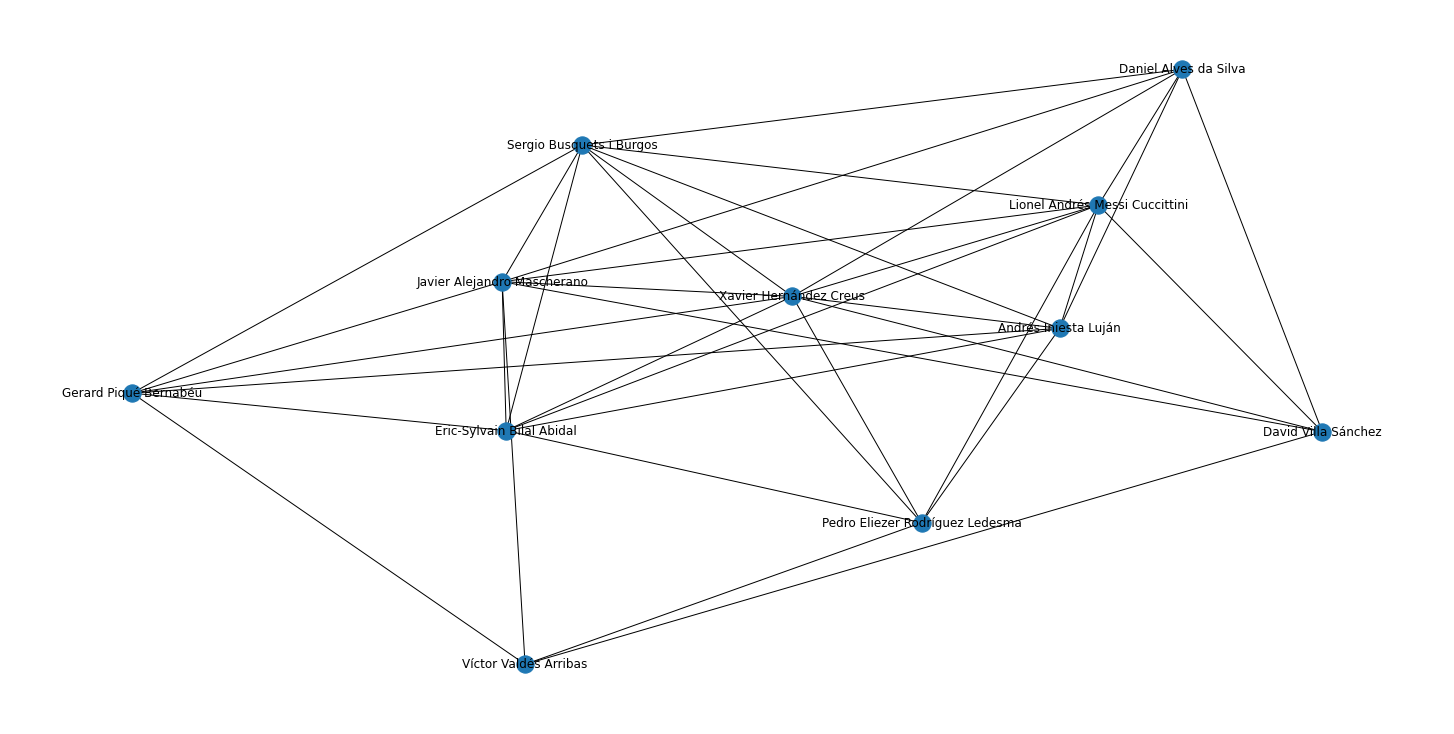

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with 4 connections
# Build your graph
G=nx.from_pandas_edgelist(game, 'player', 'pass_recipient',edge_attr='pass_count')
 
# Plot it
plt.figure(figsize=(20,10))
nx.draw(G, with_labels=True)
plt.show()

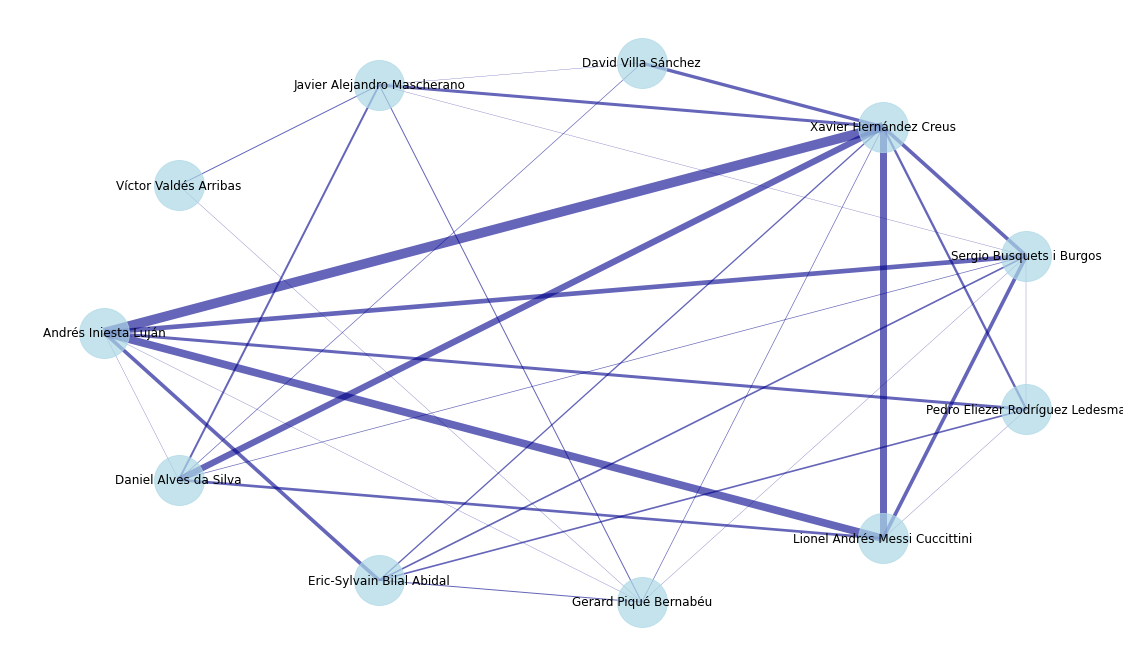

In [17]:
widths = nx.get_edge_attributes(G, 'pass_count')
nodelist = G.nodes()

plt.figure(figsize=(20,12))

pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=2500,
                       node_color='lightblue',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='darkblue',
                       alpha=0.6)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.show()

In [18]:
import pandas as pd
df3 = pd.DataFrame(events_1)
df3

,team,type,minute,location,pass_end_location,player,pass_recipient
0,Barcelona,Starting XI,0,NaN,NaN,NaN,NaN
3,Barcelona,Half Start,0,NaN,NaN,NaN,NaN
5,Barcelona,Half Start,45,NaN,NaN,NaN,NaN
9,Barcelona,Pass,0,"[35.0, 1.0]","[51.0, 16.0]",Eric-Sylvain Bilal Abidal,Lionel Andrés Messi Cuccittini
10,Barcelona,Pass,0,"[51.0, 16.0]","[50.0, 25.0]",Lionel Andrés Messi Cuccittini,Sergio Busquets i Burgos
...,...,...,...,...,...,...,...
4319,Barcelona,Offside,56,"[117.0, 16.0]",NaN,Eric-Sylvain Bilal Abidal,NaN
4322,Barcelona,Substitution,85,NaN,NaN,David Villa Sánchez,NaN
4323,Barcelona,Substitution,87,NaN,NaN,Daniel Alves da Silva,NaN
4324,Barcelona,Substitution,91,NaN,NaN,Pedro Eliezer Rodríguez Ledesma,NaN


In [19]:
df3=df3[df3['player'].notna()]
df3=df3[df3['location'].notna()]
df3

,team,type,minute,location,pass_end_location,player,pass_recipient
9,Barcelona,Pass,0,"[35.0, 1.0]","[51.0, 16.0]",Eric-Sylvain Bilal Abidal,Lionel Andrés Messi Cuccittini
10,Barcelona,Pass,0,"[51.0, 16.0]","[50.0, 25.0]",Lionel Andrés Messi Cuccittini,Sergio Busquets i Burgos
11,Barcelona,Pass,0,"[53.0, 28.0]","[55.0, 65.0]",Sergio Busquets i Burgos,Daniel Alves da Silva
17,Barcelona,Pass,0,"[8.0, 40.0]","[6.0, 70.0]",Víctor Valdés Arribas,Javier Alejandro Mascherano
18,Barcelona,Pass,1,"[21.0, 65.0]","[6.0, 48.0]",Javier Alejandro Mascherano,Víctor Valdés Arribas
...,...,...,...,...,...,...,...
4308,Barcelona,Clearance,89,"[12.0, 12.0]",NaN,Seydou Kéita,NaN
4309,Barcelona,Clearance,91,"[9.0, 46.0]",NaN,Gerard Piqué Bernabéu,NaN
4311,Barcelona,Shield,61,"[4.0, 60.0]",NaN,Sergio Busquets i Burgos,NaN
4312,Barcelona,Shield,81,"[4.0, 70.0]",NaN,Daniel Alves da Silva,NaN


In [20]:
df3[['locationx','locationy']] = pd.DataFrame(df3.location.tolist(), index= df3.index)
df3

,team,type,minute,location,pass_end_location,player,pass_recipient,locationx,locationy
9,Barcelona,Pass,0,"[35.0, 1.0]","[51.0, 16.0]",Eric-Sylvain Bilal Abidal,Lionel Andrés Messi Cuccittini,35.0,1.0
10,Barcelona,Pass,0,"[51.0, 16.0]","[50.0, 25.0]",Lionel Andrés Messi Cuccittini,Sergio Busquets i Burgos,51.0,16.0
11,Barcelona,Pass,0,"[53.0, 28.0]","[55.0, 65.0]",Sergio Busquets i Burgos,Daniel Alves da Silva,53.0,28.0
17,Barcelona,Pass,0,"[8.0, 40.0]","[6.0, 70.0]",Víctor Valdés Arribas,Javier Alejandro Mascherano,8.0,40.0
18,Barcelona,Pass,1,"[21.0, 65.0]","[6.0, 48.0]",Javier Alejandro Mascherano,Víctor Valdés Arribas,21.0,65.0
...,...,...,...,...,...,...,...,...,...
4308,Barcelona,Clearance,89,"[12.0, 12.0]",NaN,Seydou Kéita,NaN,12.0,12.0
4309,Barcelona,Clearance,91,"[9.0, 46.0]",NaN,Gerard Piqué Bernabéu,NaN,9.0,46.0
4311,Barcelona,Shield,61,"[4.0, 60.0]",NaN,Sergio Busquets i Burgos,NaN,4.0,60.0
4312,Barcelona,Shield,81,"[4.0, 70.0]",NaN,Daniel Alves da Silva,NaN,4.0,70.0


In [21]:
df3=df3.groupby(by=['player'],as_index=False).agg({'locationx':'mean','locationy':'mean'})
df3

,player,locationx,locationy
0,Andrés Iniesta Luján,69.505025,30.560302
1,Carles Puyol i Saforcada,48.750000,73.875000
2,Daniel Alves da Silva,62.225455,69.847273
3,David Villa Sánchez,78.188811,56.461538
4,Eric-Sylvain Bilal Abidal,55.901099,10.186813
5,Gerard Piqué Bernabéu,38.380000,32.780000
6,Ibrahim Afellay,79.428571,68.428571
7,Javier Alejandro Mascherano,38.244318,57.721591
8,Lionel Andrés Messi Cuccittini,78.975787,44.433414
9,Pedro Eliezer Rodríguez Ledesma,82.301205,20.391566


In [22]:
df3=df3[df3['player'].isin(game['player'].unique())].reset_index(drop=True)

In [23]:
df3.loc[(df3['locationy']<50.0),'location_y']=(100-df3['locationy'])
df3.loc[(df3['locationy']>50.0),'location_y']=(100-df3['locationy'])
df3

,player,locationx,locationy,location_y
0,Andrés Iniesta Luján,69.505025,30.560302,69.439698
1,Daniel Alves da Silva,62.225455,69.847273,30.152727
2,David Villa Sánchez,78.188811,56.461538,43.538462
3,Eric-Sylvain Bilal Abidal,55.901099,10.186813,89.813187
4,Gerard Piqué Bernabéu,38.380000,32.780000,67.220000
5,Javier Alejandro Mascherano,38.244318,57.721591,42.278409
6,Lionel Andrés Messi Cuccittini,78.975787,44.433414,55.566586
7,Pedro Eliezer Rodríguez Ledesma,82.301205,20.391566,79.608434
8,Sergio Busquets i Burgos,53.750916,38.622711,61.377289
9,Víctor Valdés Arribas,11.915493,40.633803,59.366197


In [24]:
df3.set_index('player',inplace=True)

In [25]:

!pip install highlight_text

In [26]:
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from matplotlib.colors import to_rgba
import numpy as np
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colorbar
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import fig_text
import math

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


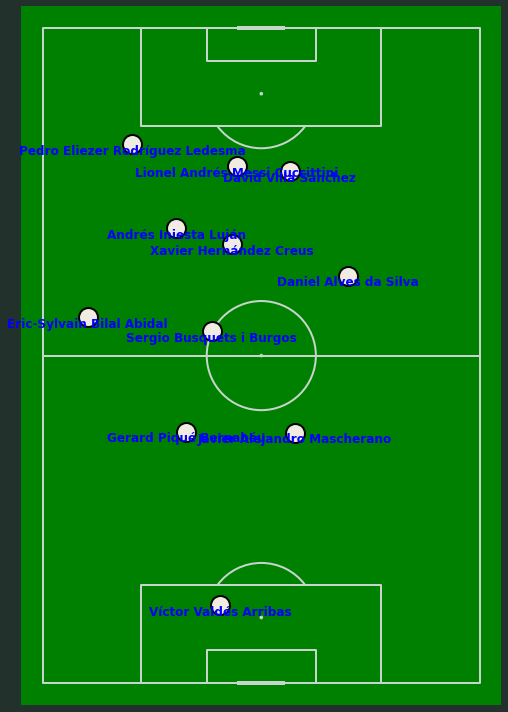

In [27]:
#plotting the average location for the players
#Make arrows less transparent if they have a higher count, totally optional of course
from mplsoccer import Pitch, VerticalPitch
import numpy as np
min_transparency = 0.3
color = np.array(to_rgba('#d3d3d3'))
color = np.tile(color, (len(df3), 1))


#plot pitch
pitch = VerticalPitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='green', line_color='#c7d5cc', figsize=(20, 1),
              constrained_layout=True, tight_layout=False,half=False)
fig, ax = pitch.draw(figsize=(20,10))



''' 
pass_arrows = pitch.arrows(1.2*passes_between.x, 80-0.8*passes_between.y,
                         1.2*passes_between.x_end, 80-0.8*passes_between.y_end, width=5,
                         headwidth=5, headlength=5, color=color, ax=ax, zorder=1)

size=1000
radius = math.sqrt(size)/2.
arrow = mpl.patches.FancyArrowPatch(posA=(1.2*passes_between.x,80-.8*passes_between.y), 
                                    posB=(1.2*passes_between.x_end,80-.8*passes_between.y_end), 
                                    arrowstyle='-|>', mutation_scale=20, shrinkA=radius, shrinkB=radius)

ax.add_patch(arrow)
 '''
#plot nodes
pass_nodes = pitch.scatter(1.2*df3.locationx, 80-0.8*df3.location_y,s=360,
                           color='#f0ece2', edgecolors="#010101", linewidth=2, alpha=1, ax=ax, zorder=2)


#anootation/key at bottom
# pitch.annotate("Node Positions = Average Start Location of Completed Passes\nArrows Show Pass Combinations Which Occured Over 5 Times", (-4, 40), color='w',
#                fontsize=10, ha='center', va='center', ax=ax, fontweight='bold', fontfamily="Andale Mono")


#Uncomment these next two lines to get each node labeled with the player id. Check to see if anything looks off, and make note of each player if you're going to add labeles later like their numbers
for index, row in df3.iterrows():
     pitch.annotate(row.name, xy=(1.2*row.locationx, 80-0.8*row.location_y), c='blue', va='top', ha='center', size=12, fontweight='bold', fontfamily="Calibri",ax=ax)

#Set the background color
fig.patch.set_facecolor('#22312b')


In [28]:
nx.write_gml(G, "BARvsMU(BAR).gml")